In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots

In [2]:
babies = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week7/baby.csv')
sf = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week8/san_francisco_2015.csv')

In [3]:
sf_norm = sf.where("Total Compensation", are.above(11*20*52))

In [4]:
sf_values = sf_norm.select("Total Compensation")

In [5]:
def compute_median(values):
    return percentile(50, values)

In [6]:
population_median = compute_median(sf_values.column(0))
population_median

108200.83

In [7]:
sf_sample = sf_values.sample(100,with_replacement=False)
sf_sample.show(2)

Total Compensation
144577
173580


In [8]:
def resample(sample):
    return sample.sample(sample.num_rows)

In [9]:
one_resample = resample(sf_sample)
one_resample.show(2)

Total Compensation
81789.8
77790.8


In [10]:
def bootstrap_medians(sample, size, column, repetitions):
    statistics = make_array()
    for i in np.arange(repetitions):
        resample = sample.sample(size)
        statistics = np.append(statistics,percentile(50,resample.column(column)))
    return statistics

In [33]:
bmedians = bootstrap_medians(sf_sample,sf_sample.num_rows, 0,200)

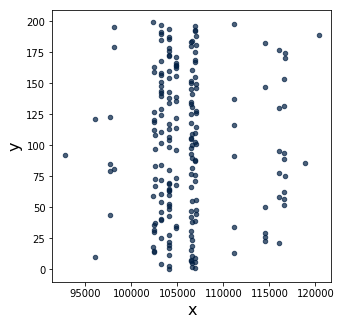

In [35]:
Table().with_column("x", bmedians).with_column("y", np.arange(200)).scatter("x")

In [38]:
left = percentile(2.5, bmedians)
right = percentile(97.5, bmedians)
make_array(left,right)

array([ 97733.8 , 116569.02])

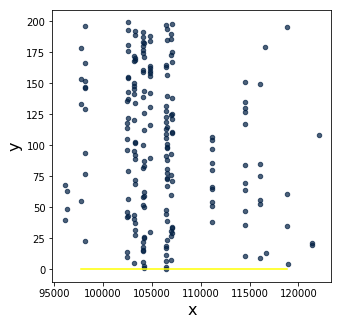

In [40]:
Table().with_column("x", bmedians).with_column("y", np.arange(200)).scatter("x")
plots.plot(make_array(left,right),make_array(0,0), color="yellow")

In [ ]:
repetitions = 100
lefts = make_array()
rights = make_array()
for i in np.arange(repetitions):
    a_sample = sf_norm.sample(100,with_replacement=False)
    bmedians = bootstrap_medians(a_sample,100,"Total Compensation",100)
    left = percentile(2.5, bmedians)
    right = percentile(97.5,bmedians)
    lefts = np.append(lefts, left)
    rights = np.append(rights, right)
intervals = Table().with_column("Left", lefts).with_column("Right", rights)

In [ ]:
intervals